This file visualizes a linear combination of vectors $ \sum_{i=1}^3 \lambda_i \vec{a}_i$. 
The reddish arrows represent the vectors $\vec{a_i}$ and the blue vector represents $\vec{v}$

In [1]:
########################### importing necessary modules, don't change anything just yet
%matplotlib notebook
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from matplotlib.lines import Line2D

Below you can change the vectors and some options for plotting if you like

In [2]:
# creating three vectors a_i
a_i = np.array([[0,1,2],[2,0,-1],[5,-3,-1]]) # as in EX2_P3 a)
#creating vector v
v = np.array([[1,-2,3]])
# lambdas
l_i = np.array([1,-2,1])    # the numbers are lambda_1, lambda_2 and lambda_3

basecase = False    #False: shows linear combination, True: shows only vectors itself
lambdas = False     #only works with basecase = True


# some options for plotting, you don't need to change any of these
lims = 4    # limit of axis (ie x,y,z axis are limited from -lims to lims)
ms = 15     # size of arrow heads
lw = 2      # line width
figsize = 7 # size of figure
fs = 12     # fontsize

<IPython.core.display.Javascript object>


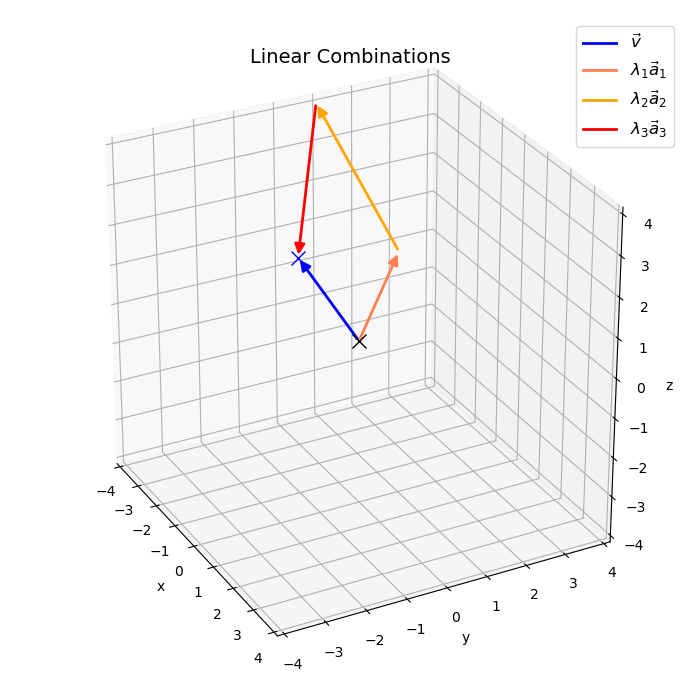

In [3]:

a_01 = l_i[0]*a_i[0] + l_i[1]*a_i[1]
a_02 = a_01 + l_i[2]*a_i[2]

lc_i = np.asarray([l_i[0]*a_i[0],a_01,a_02])
bases = np.asarray([[0,0,0],lc_i[0],lc_i[1]])

fig = plt.figure(figsize=(figsize,figsize))
ax = fig.add_subplot(111, projection='3d')

ax.plot([0], [0], [0], 'x', markersize=10, color='k', alpha=1)
ax.plot([v[0][0]], [v[0][1]], [v[0][2]], 'x', markersize=10, color='b', alpha=1)

###############################################################################
##################### Plotting happens here ###################################
###############################################################################
matplotlib.rcParams.update({'font.size': fs})


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

color = ['coral','orange','red']
if basecase:
    for i in range(3):
        if lambdas:
            labels = [r'$\vec{v}$', r'$\lambda_1\vec{a}_1$', r'$\lambda_2\vec{a}_2$', r'$\lambda_3\vec{a}_3$']
            
            a = Arrow3D([0, l_i[i]* a_i[i][0]], [0, l_i[i]* a_i[i][1]], 
                        [0, l_i[i]* a_i[i][2]], mutation_scale=ms, 
                        lw=lw, arrowstyle="-|>", color=color[i])
        else:
            labels = [r'$\vec{v}$', r'$\vec{a}_1$', r'$\vec{a}_2$', r'$\vec{a}_3$']
            
            a = Arrow3D([0,  a_i[i][0]], [0,  a_i[i][1]], 
                    [0,  a_i[i][2]], mutation_scale=ms, 
                    lw=lw, arrowstyle="-|>", color=color[i])    
        ax.add_artist(a)
        
    for V in v:
    
        a = Arrow3D([0, V[0]], [0, V[1]], 
                    [0, V[2]], mutation_scale=ms, 
                    lw=lw, arrowstyle="-|>", color="b")
        ax.add_artist(a)
        

else:
    labels = [r'$\vec{v}$', r'$\lambda_1\vec{a}_1$', r'$\lambda_2\vec{a}_2$', r'$\lambda_3\vec{a}_3$']

    for i in range(3):
        a = Arrow3D([bases[i][0],  lc_i[i][0]], [bases[i][1],  lc_i[i][1]], 
                    [bases[i][2],  lc_i[i][2]], mutation_scale=ms, 
                    lw=lw, arrowstyle="-|>", color=color[i])
        ax.add_artist(a)
        
    for V in v:
        a = Arrow3D([0, V[0]], [0, V[1]], 
                    [0, V[2]], mutation_scale=ms, 
                    lw=lw, arrowstyle="-|>", color="b")
        ax.add_artist(a)

      
custom_lines = [Line2D([0], [0], color='b', lw=lw),
                Line2D([0], [0], color=color[0], lw=lw),
                Line2D([0], [0], color=color[1], lw=lw),
                Line2D([0], [0], color=color[2], lw=lw)]  
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-lims,lims)
ax.set_ylim(-lims,lims)
ax.set_zlim(-lims,lims)
ax.legend(custom_lines, labels)
plt.title('Linear Combinations',fontsize = fs+2)
fig.tight_layout()
plt.draw()
plt.show()